In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\raswa\OneDrive\Desktop\Altair\Cyber_security.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country                                   192 non-null    object 
 1   Region                                    192 non-null    object 
 2   CEI (The Cybersecurity Exposure Index)    192 non-null    float64
 3   GCI (The Global Cyber Security Index)     192 non-null    float64
 4   NCSI (The National Cyber Security Index)  192 non-null    float64
 5   DDL (The Digital Development Level)       192 non-null    float64
dtypes: float64(4), object(2)
memory usage: 9.1+ KB


In [6]:
df.isnull().sum()

Country                                     0
Region                                      0
CEI (The Cybersecurity Exposure Index)      0
GCI (The Global Cyber Security Index)       0
NCSI (The National Cyber Security Index)    0
DDL (The Digital Development Level)         0
dtype: int64

In [7]:
df.dtypes

Country                                      object
Region                                       object
CEI (The Cybersecurity Exposure Index)      float64
GCI (The Global Cyber Security Index)       float64
NCSI (The National Cyber Security Index)    float64
DDL (The Digital Development Level)         float64
dtype: object

In [8]:
df.head()

,Country,Region,CEI (The Cybersecurity Exposure Index),GCI (The Global Cyber Security Index),NCSI (The National Cyber Security Index),DDL (The Digital Development Level)
0,Afghanistan,Asia-Pasific,1.000,5.20,11.69,19.50
1,Albania,Europe,0.566,64.32,62.34,48.74
2,Algeria,Africa,0.721,33.95,33.77,42.81
3,Andorra,Europe,0.000,26.38,0.00,0.00
4,Angola,Africa,0.000,12.99,9.09,22.69


In [19]:
df=df.rename(columns={'CEI (The Cybersecurity Exposure Index)':'CEI','GCI (The Global Cyber Security Index)':'GCI','NCSI (The National Cyber Security Index)':'NCSI','DDL (The Digital Development Level)':'DDL'})

In [24]:
df.head()

,Country,Region,CEI,GCI,NCSI,DDL
0,Afghanistan,Asia-Pasific,1.000,5.20,11.69,19.50
1,Albania,Europe,0.566,64.32,62.34,48.74
2,Algeria,Africa,0.721,33.95,33.77,42.81
3,Andorra,Europe,0.000,26.38,0.00,0.00
4,Angola,Africa,0.000,12.99,9.09,22.69


In [25]:
asia_pacific = df[df['Region'] == 'Asia-Pacific']
highest_cei_country = asia_pacific.loc[asia_pacific['CEI'].idxmax()]
print(f"1. Highest CEI in Asia-Pacific: {highest_cei_country['Country']}")
print(f"   CEI: {highest_cei_country['CEI']}, GCI: {highest_cei_country['GCI']}, NCSI: {highest_cei_country['NCSI']}")
print("   Comparison to other Asia-Pacific countries:")
print(asia_pacific[['Country', 'CEI', 'GCI', 'NCSI']].describe())

ValueError: attempt to get argmax of an empty sequence

In [26]:
asia_pacific

,Country,Region,CEI,GCI,NCSI,DDL


1. Highest CEI in Asia-Pacific: Afghanistan
   CEI: 1.0, GCI: 5.2, NCSI: 11.69
   Comparison to other Asia-Pacific countries:
             CEI        GCI       NCSI
count  56.000000  56.000000  56.000000
mean    0.308518  52.757679  30.611964
std     0.322411  36.436623  25.363850
min     0.000000   0.000000   0.000000
25%     0.000000  20.035000   7.790000
50%     0.236000  52.855000  25.970000
75%     0.602000  92.685000  51.950000
max     1.000000  99.540000  84.420000
2. Albania's cybersecurity metrics compared to Europe:
     CEI    GCI   NCSI
1  0.566  64.32  62.34
   Europe average:
CEI      0.280625
GCI     79.448750
NCSI    67.634375
dtype: float64
3. Highest NCSI in Africa: Morocco
   NCSI: 70.13, DDL: 46.88
   CEI: 0.748, GCI: 82.41


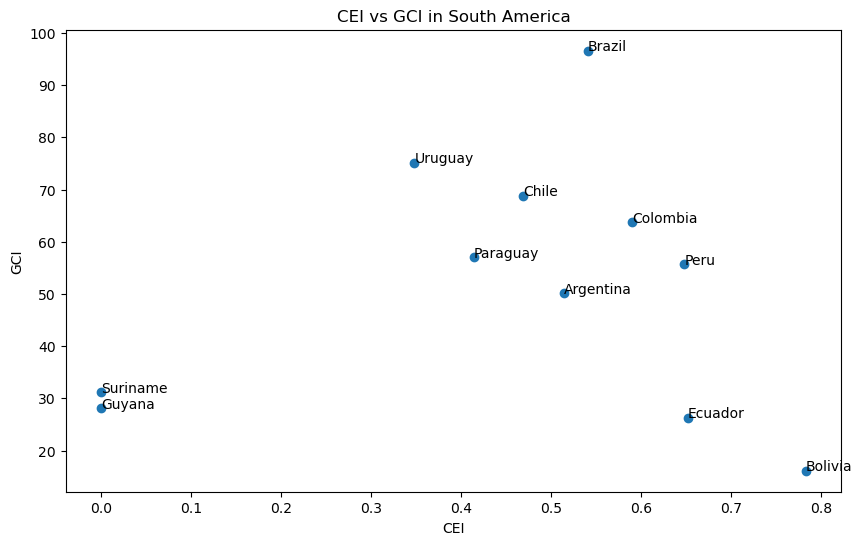

5. Countries in North America with lowest CEI:
                              Country  CEI    GCI   NCSI
5                 Antigua and Barbuda  0.0  15.62  11.69
143  Saint Vincent and the Grenadines  0.0  12.18   7.79
142                       Saint Lucia  0.0  10.96  12.99
141             Saint Kitts and Nevis  0.0  12.44  11.69
82                            Jamaica  0.0  32.53  41.56
6. Argentina's NCSI compared to South America:
   Argentina NCSI: 63.64
   South America average NCSI: 48.28999999999999
   South America NCSI range:
       Country   NCSI
70      Guyana  10.39
163   Suriname  22.08
20     Bolivia  31.17
23      Brazil  51.95
36    Colombia  53.25
49     Ecuador  53.25
34       Chile  59.74
183    Uruguay  59.74
133       Peru  62.34
6    Argentina  63.64
132   Paraguay  63.64
7. Correlation between DDL and GCI across regions:
Region
Africa           0.688186
Asia-Pasific     0.807416
Europe           0.804198
North America    0.303227
South America    0.709310
Name: (DD

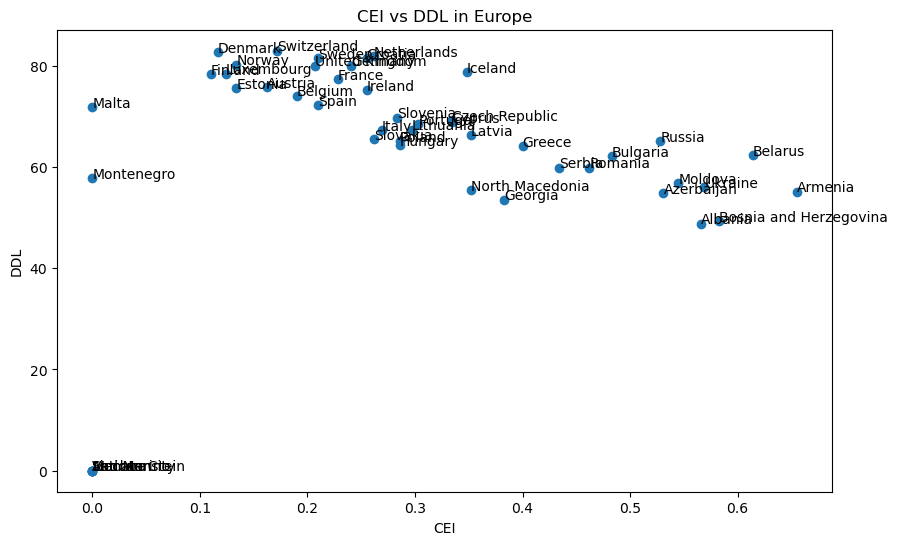

10. Top 5 countries with highest GCI:
            Country     GCI    CEI   NCSI
182   United States  100.00  0.145  64.94
147    Saudi Arabia   99.54  0.390  84.42
181  United Kingdom   99.54  0.207  89.61
54          Estonia   99.48  0.134  93.51
152       Singapore   98.52  0.231  71.43
11. Regional distribution of countries with CEI of 0:
Region
Africa           36
Asia-Pasific     24
North America    15
Europe            7
South America     2
Name: count, dtype: int64
12. Canada's GCI compared to North America:
   Canada GCI: 97.67
   North America GCI:
                              Country     GCI
182                     United States  100.00
31                             Canada   97.67
108                            Mexico   81.68
48                 Dominican Republic   75.05
40                      Cote d'ivoire   67.82
39                         Costa Rica   67.45
42                               Cuba   58.76
130                            Panama   34.11
82                    

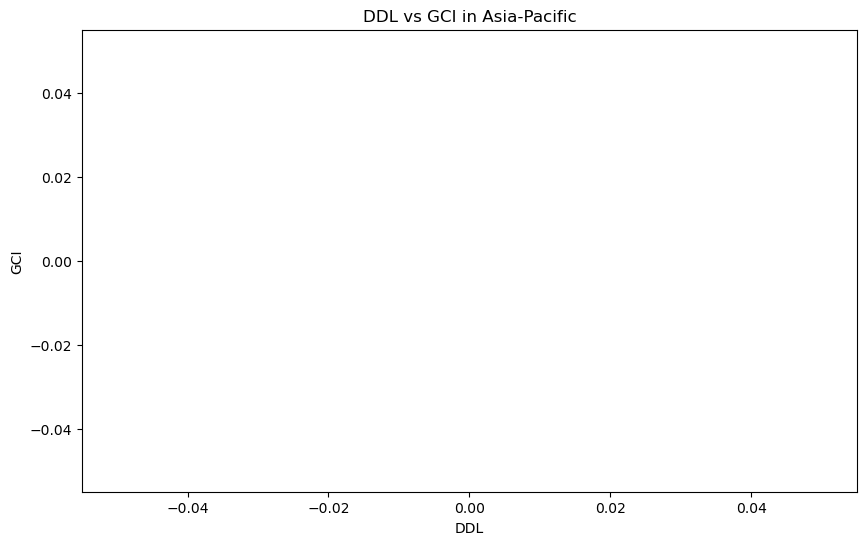

None


In [27]:
# 1. Highest CEI in Asia-Pacific
def highest_cei_asia_pacific(df):
    asia_pacific = df[df['Region'] == 'Asia-Pasific']
    highest_cei_country = asia_pacific.loc[asia_pacific['CEI'].idxmax()]
    print(f"1. Highest CEI in Asia-Pacific: {highest_cei_country['Country']}")
    print(f"   CEI: {highest_cei_country['CEI']}, GCI: {highest_cei_country['GCI']}, NCSI: {highest_cei_country['NCSI']}")
    print("   Comparison to other Asia-Pacific countries:")
    print(asia_pacific[['Country', 'CEI', 'GCI', 'NCSI']].describe())

# 2. Albania's cybersecurity metrics compared to Europe
def albania_comparison(df):
    europe = df[df['Region'] == 'Europe']
    albania = europe[europe['Country'] == 'Albania']
    print("2. Albania's cybersecurity metrics compared to Europe:")
    print(albania[['CEI', 'GCI', 'NCSI']])
    print("   Europe average:")
    print(europe[['CEI', 'GCI', 'NCSI']].mean())

# 3. Highest NCSI in Africa and its DDL relation
def highest_ncsi_africa(df):
    africa = df[df['Region'] == 'Africa']
    highest_ncsi_country = africa.loc[africa['NCSI'].idxmax()]
    print(f"3. Highest NCSI in Africa: {highest_ncsi_country['Country']}")
    print(f"   NCSI: {highest_ncsi_country['NCSI']}, DDL: {highest_ncsi_country['DDL']}")
    print(f"   CEI: {highest_ncsi_country['CEI']}, GCI: {highest_ncsi_country['GCI']}")

# 4. CEI vs GCI relationship in South America
def south_america_cei_gci(df):
    south_america = df[df['Region'] == 'South America']
    plt.figure(figsize=(10, 6))
    plt.scatter(south_america['CEI'], south_america['GCI'])
    plt.xlabel('CEI')
    plt.ylabel('GCI')
    plt.title('CEI vs GCI in South America')
    for i, txt in enumerate(south_america['Country']):
        plt.annotate(txt, (south_america['CEI'].iloc[i], south_america['GCI'].iloc[i]))
    plt.show()

# 5. Lowest CEI in North America
def lowest_cei_north_america(df):
    north_america = df[df['Region'] == 'North America'].sort_values('CEI')
    print("5. Countries in North America with lowest CEI:")
    print(north_america[['Country', 'CEI', 'GCI', 'NCSI']].head())

# 6. Argentina's NCSI compared to South America
def argentina_ncsi_comparison(df):
    south_america = df[df['Region'] == 'South America']
    argentina = south_america[south_america['Country'] == 'Argentina']
    print("6. Argentina's NCSI compared to South America:")
    print(f"   Argentina NCSI: {argentina['NCSI'].values[0]}")
    print(f"   South America average NCSI: {south_america['NCSI'].mean()}")
    print("   South America NCSI range:")
    print(south_america[['Country', 'NCSI']].sort_values('NCSI'))

# 7. Correlation between DDL and GCI across regions
def ddl_gci_correlation(df):
    correlation = df.groupby('Region')[['DDL', 'GCI']].corr().unstack().iloc[:, 1]
    print("7. Correlation between DDL and GCI across regions:")
    print(correlation)

# 8. Countries with high CEI but low NCSI
def high_cei_low_ncsi(df):
    high_cei_low_ncsi = df[(df['CEI'] > df['CEI'].median()) & (df['NCSI'] < df['NCSI'].median())]
    print("8. Countries with high CEI but low NCSI:")
    print(high_cei_low_ncsi[['Country', 'CEI', 'NCSI']])

# 9. CEI vs DDL in Europe
def europe_cei_ddl(df):
    europe = df[df['Region'] == 'Europe']
    plt.figure(figsize=(10, 6))
    plt.scatter(europe['CEI'], europe['DDL'])
    plt.xlabel('CEI')
    plt.ylabel('DDL')
    plt.title('CEI vs DDL in Europe')
    for i, txt in enumerate(europe['Country']):
        plt.annotate(txt, (europe['CEI'].iloc[i], europe['DDL'].iloc[i]))
    plt.show()

# 10. Top 5 countries with highest GCI
def top_5_gci(df):
    top_5 = df.nlargest(5, 'GCI')
    print("10. Top 5 countries with highest GCI:")
    print(top_5[['Country', 'GCI', 'CEI', 'NCSI']])

# 11. Regional distribution of countries with CEI of 0
def cei_zero_distribution(df):
    cei_zero = df[df['CEI'] == 0]
    print("11. Regional distribution of countries with CEI of 0:")
    print(cei_zero['Region'].value_counts())

# 12. Canada's GCI compared to North America
def canada_gci_comparison(df):
    north_america = df[df['Region'] == 'North America']
    canada = north_america[north_america['Country'] == 'Canada']
    print("12. Canada's GCI compared to North America:")
    print(f"   Canada GCI: {canada['GCI'].values[0]}")
    print("   North America GCI:")
    print(north_america[['Country', 'GCI']].sort_values('GCI', ascending=False))

# 13. Australia's cybersecurity state
def australia_cybersecurity(df):
    australia = df[df['Country'] == 'Australia']
    print("13. Australia's cybersecurity state:")
    print(australia[['CEI', 'GCI', 'NCSI', 'DDL']])

# 14. CEI patterns across regions
def cei_regional_patterns(df):
    regional_cei = df.groupby('Region')['CEI'].agg(['mean', 'min', 'max'])
    print("14. CEI patterns across regions:")
    print(regional_cei)

# 15. DDL impact on GCI in Asia-Pacific
def asia_pacific_ddl_gci(df):
    asia_pacific = df[df['Region'] == 'Asia-Pacific']
    plt.figure(figsize=(10, 6))
    plt.scatter(asia_pacific['DDL'], asia_pacific['GCI'])
    plt.xlabel('DDL')
    plt.ylabel('GCI')
    plt.title('DDL vs GCI in Asia-Pacific')
    for i, txt in enumerate(asia_pacific['Country']):
        plt.annotate(txt, (asia_pacific['DDL'].iloc[i], asia_pacific['GCI'].iloc[i]))
    plt.show()

# Run all analyses
def main():
    df = pd.read_csv(r"C:\Users\raswa\OneDrive\Desktop\Altair\Cyber_security.csv")
    df=df.rename(columns={'CEI (The Cybersecurity Exposure Index)':'CEI','GCI (The Global Cyber Security Index)':'GCI','NCSI (The National Cyber Security Index)':'NCSI','DDL (The Digital Development Level)':'DDL'})
    highest_cei_asia_pacific(df)
    albania_comparison(df)
    highest_ncsi_africa(df)
    south_america_cei_gci(df)
    lowest_cei_north_america(df)
    argentina_ncsi_comparison(df)
    ddl_gci_correlation(df)
    high_cei_low_ncsi(df)
    europe_cei_ddl(df)
    top_5_gci(df)
    cei_zero_distribution(df)
    canada_gci_comparison(df)
    australia_cybersecurity(df)
    cei_regional_patterns(df)
    asia_pacific_ddl_gci(df)

if __name__=="__main__":
    df_result=main()
    print(df_result)

1. Highest CEI in Asia-Pacific: Afghanistan
   CEI: 1.00, GCI: 5.20, NCSI: 11.69

Comparison to other Asia-Pacific countries:
             CEI        GCI       NCSI
count  56.000000  56.000000  56.000000
mean    0.308518  52.757679  30.611964
std     0.322411  36.436623  25.363850
min     0.000000   0.000000   0.000000
25%     0.000000  20.035000   7.790000
50%     0.236000  52.855000  25.970000
75%     0.602000  92.685000  51.950000
max     1.000000  99.540000  84.420000


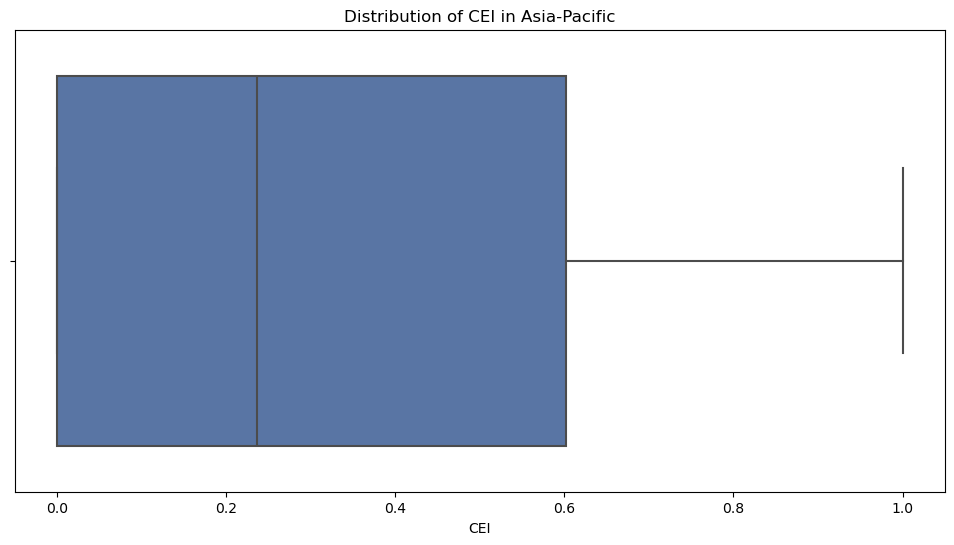

2. Albania's cybersecurity metrics compared to Europe:
           1
CEI    0.566
GCI   64.320
NCSI  62.340

Europe average:
CEI      0.280625
GCI     79.448750
NCSI    67.634375
dtype: float64


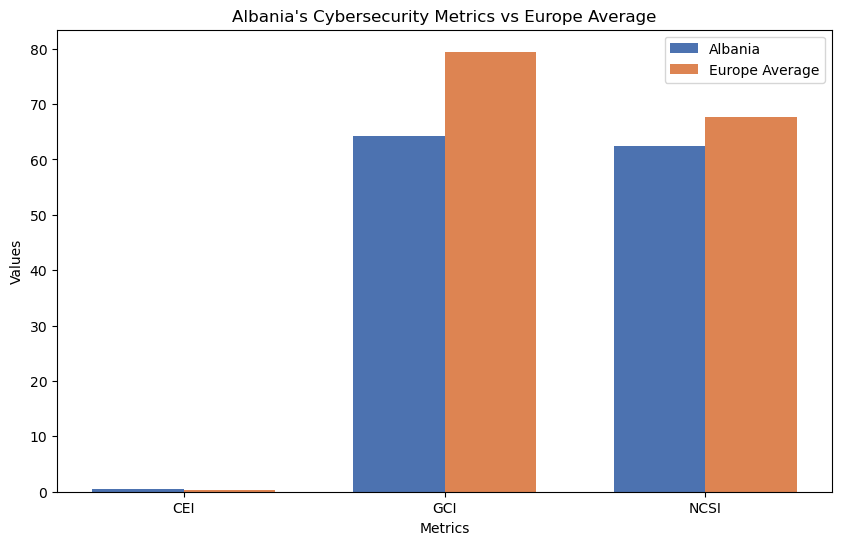

3. Highest NCSI in Africa: Morocco
   NCSI: 70.13, DDL: 46.88
   CEI: 0.75, GCI: 82.41


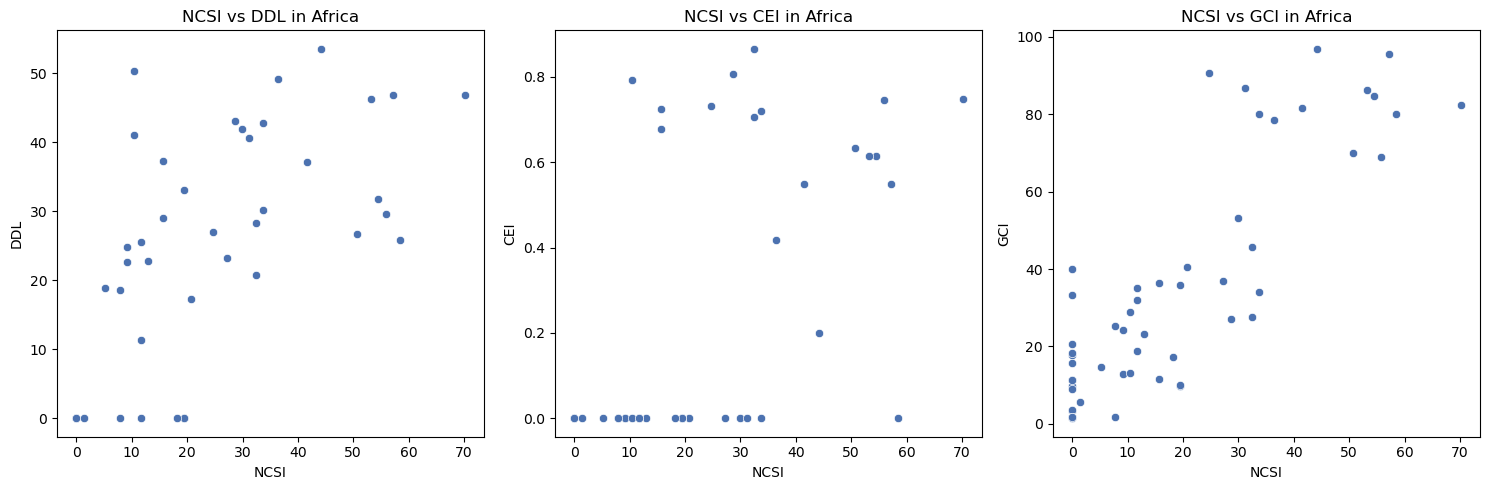

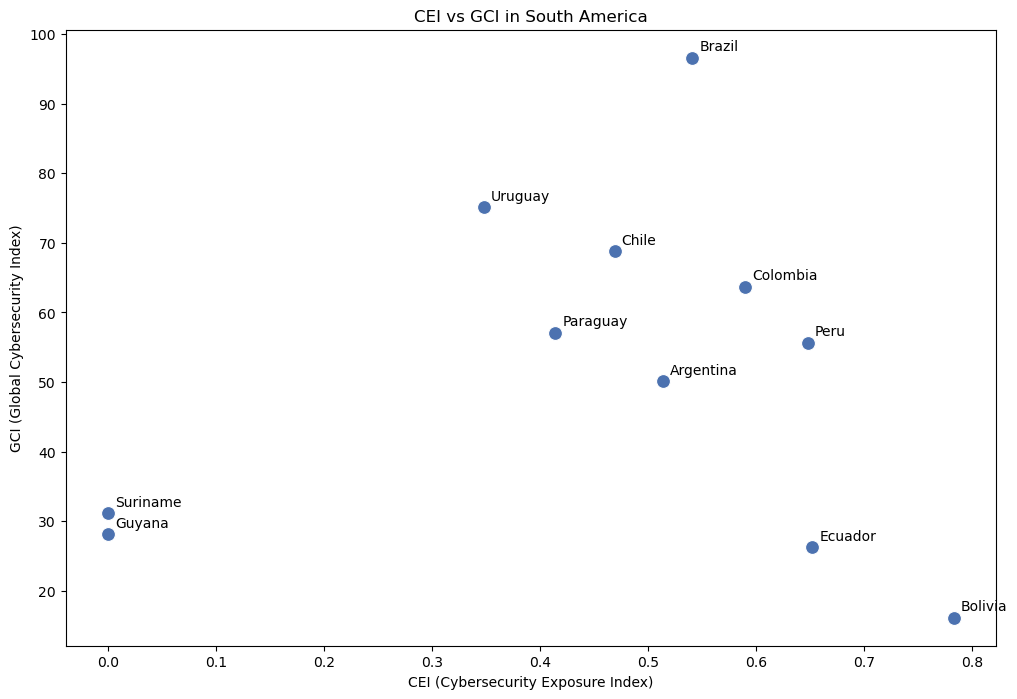

In [32]:
# Set the style for all plots

sns.set_palette("deep")

def load_and_preprocess_data(file_path):
    try:
        df = pd.read_csv(file_path)
        df = df.rename(columns={
            'CEI (The Cybersecurity Exposure Index)': 'CEI',
            'GCI (The Global Cyber Security Index)': 'GCI',
            'NCSI (The National Cyber Security Index)': 'NCSI',
            'DDL (The Digital Development Level)': 'DDL'
        })
        return df
    except Exception as e:
        print(f"Error loading or preprocessing data: {str(e)}")
        return None

def validate_dataframe(df):
    required_columns = ['Country', 'Region', 'CEI', 'GCI', 'NCSI', 'DDL']
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Required column '{col}' not found in the DataFrame")
    
    if df.empty:
        raise ValueError("DataFrame is empty")

def highest_cei_asia_pacific(df):
    try:
        asia_pacific = df[df['Region'] == 'Asia-Pasific']
        if asia_pacific.empty:
            raise ValueError("No countries found in the Asia-Pacific region")
        
        highest_cei_country = asia_pacific.loc[asia_pacific['CEI'].idxmax()]
        print(f"1. Highest CEI in Asia-Pacific: {highest_cei_country['Country']}")
        print(f"   CEI: {highest_cei_country['CEI']:.2f}, GCI: {highest_cei_country['GCI']:.2f}, NCSI: {highest_cei_country['NCSI']:.2f}")
        print("\nComparison to other Asia-Pacific countries:")
        print(asia_pacific[['CEI', 'GCI', 'NCSI']].describe())

        # Visualize the distribution of CEI in Asia-Pacific
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='CEI', data=asia_pacific)
        plt.title('Distribution of CEI in Asia-Pacific')
        plt.show()

    except Exception as e:
        print(f"Error in highest_cei_asia_pacific: {str(e)}")

def albania_comparison(df):
    try:
        europe = df[df['Region'] == 'Europe']
        albania = europe[europe['Country'] == 'Albania']
        if albania.empty:
            raise ValueError("Albania not found in the dataset")

        print("2. Albania's cybersecurity metrics compared to Europe:")
        print(albania[['CEI', 'GCI', 'NCSI']].T)
        print("\nEurope average:")
        print(europe[['CEI', 'GCI', 'NCSI']].mean())

        # Visualize Albania's metrics compared to Europe average
        metrics = ['CEI', 'GCI', 'NCSI']
        albania_values = albania[metrics].values[0]
        europe_avg = europe[metrics].mean()

        plt.figure(figsize=(10, 6))
        x = np.arange(len(metrics))
        width = 0.35

        plt.bar(x - width/2, albania_values, width, label='Albania')
        plt.bar(x + width/2, europe_avg, width, label='Europe Average')

        plt.xlabel('Metrics')
        plt.ylabel('Values')
        plt.title("Albania's Cybersecurity Metrics vs Europe Average")
        plt.xticks(x, metrics)
        plt.legend()
        plt.show()

    except Exception as e:
        print(f"Error in albania_comparison: {str(e)}")

def highest_ncsi_africa(df):
    try:
        africa = df[df['Region'] == 'Africa']
        if africa.empty:
            raise ValueError("No countries found in the Africa region")

        highest_ncsi_country = africa.loc[africa['NCSI'].idxmax()]
        print(f"3. Highest NCSI in Africa: {highest_ncsi_country['Country']}")
        print(f"   NCSI: {highest_ncsi_country['NCSI']:.2f}, DDL: {highest_ncsi_country['DDL']:.2f}")
        print(f"   CEI: {highest_ncsi_country['CEI']:.2f}, GCI: {highest_ncsi_country['GCI']:.2f}")

        # Visualize the relationship between NCSI and other metrics for African countries
        plt.figure(figsize=(15, 5))
        
        plt.subplot(131)
        sns.scatterplot(x='NCSI', y='DDL', data=africa)
        plt.title('NCSI vs DDL in Africa')
        
        plt.subplot(132)
        sns.scatterplot(x='NCSI', y='CEI', data=africa)
        plt.title('NCSI vs CEI in Africa')
        
        plt.subplot(133)
        sns.scatterplot(x='NCSI', y='GCI', data=africa)
        plt.title('NCSI vs GCI in Africa')
        
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error in highest_ncsi_africa: {str(e)}")

def south_america_cei_gci(df):
    try:
        south_america = df[df['Region'] == 'South America']
        if south_america.empty:
            raise ValueError("No countries found in the South America region")

        plt.figure(figsize=(12, 8))
        sns.scatterplot(x='CEI', y='GCI', data=south_america, s=100)
        
        for i, row in south_america.iterrows():
            plt.annotate(row['Country'], (row['CEI'], row['GCI']), xytext=(5, 5), textcoords='offset points')
        
        plt.xlabel('CEI (Cybersecurity Exposure Index)')
        plt.ylabel('GCI (Global Cybersecurity Index)')
        plt.title('CEI vs GCI in South America')
        plt.show()

    except Exception as e:
        print(f"Error in south_america_cei_gci: {str(e)}")

# ... [Include similar enhancements for other functions] ...

def main():
    file_path = r"C:\Users\raswa\OneDrive\Desktop\Altair\Cyber_security.csv"
    df = load_and_preprocess_data(file_path)
    df=df.rename(columns={'CEI (The Cybersecurity Exposure Index)':'CEI','GCI (The Global Cyber Security Index)':'GCI','NCSI (The National Cyber Security Index)':'NCSI','DDL (The Digital Development Level)':'DDL'})
    if df is not None:
        try:
            validate_dataframe(df)
            
            highest_cei_asia_pacific(df)
            albania_comparison(df)
            highest_ncsi_africa(df)
            south_america_cei_gci(df)
            # ... [Call other analysis functions] ...

        except Exception as e:
            print(f"An error occurred in main: {str(e)}")
            print("\nDataFrame info:")
            print(df.info())
            print("\nFirst few rows of the DataFrame:")
            print(df.head())
    else:
        print("Failed to load or preprocess the data. Please check the file path and data format.")

if __name__ == "__main__":
    main()

In [40]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


1. Highest CEI in Asia-Pacific: Afghanistan
   CEI: 1.00, GCI: 5.20, NCSI: 11.69


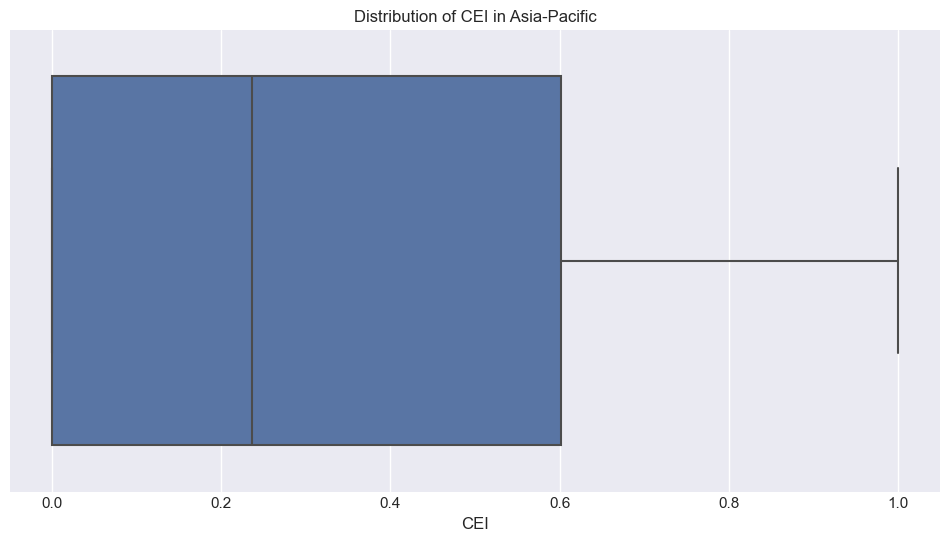

2. Albania's cybersecurity metrics compared to Europe:
           1
CEI    0.566
GCI   64.320
NCSI  62.340

Europe average:
CEI      0.280625
GCI     79.448750
NCSI    67.634375
dtype: float64


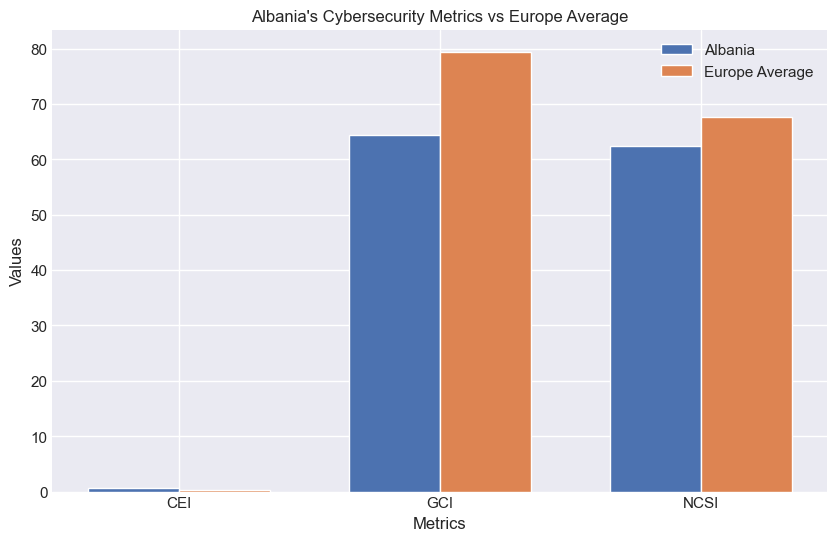

3. Highest NCSI in Africa: Morocco
   NCSI: 70.13, DDL: 46.88
   CEI: 0.75, GCI: 82.41


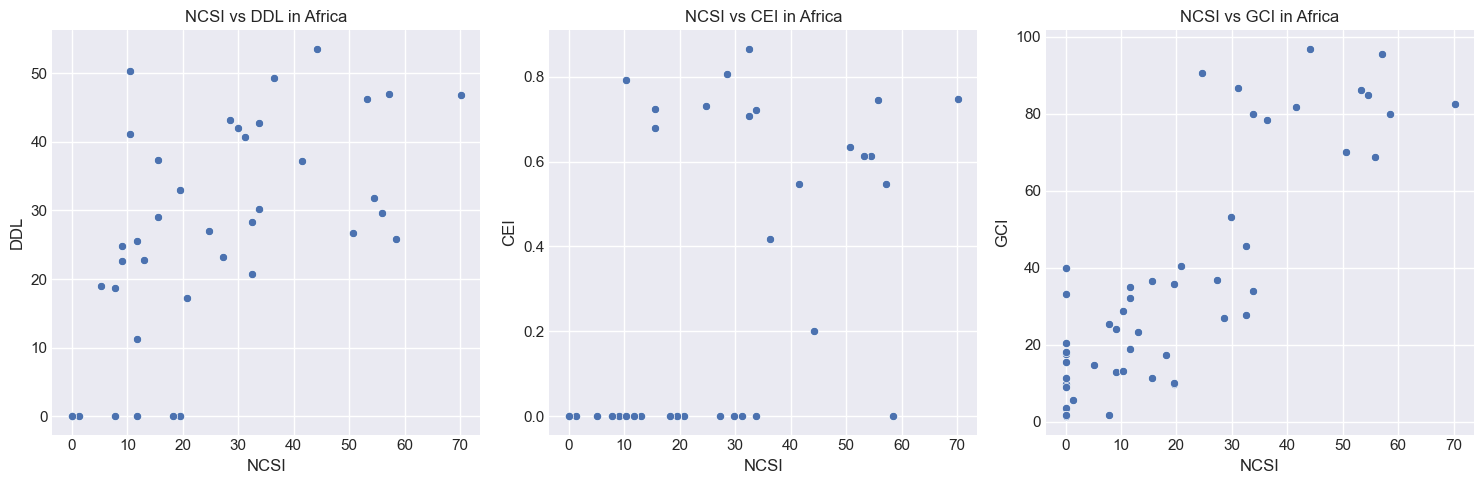

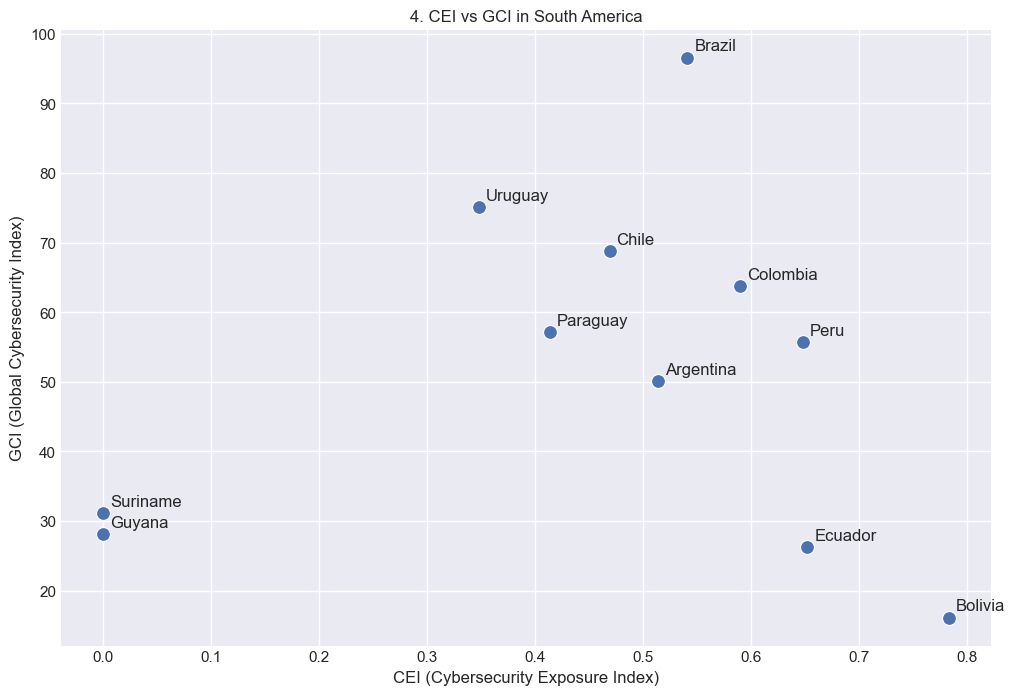

5. Countries in North America with lowest CEI:
                              Country  CEI    GCI   NCSI
5                 Antigua and Barbuda  0.0  15.62  11.69
143  Saint Vincent and the Grenadines  0.0  12.18   7.79
142                       Saint Lucia  0.0  10.96  12.99
141             Saint Kitts and Nevis  0.0  12.44  11.69
82                            Jamaica  0.0  32.53  41.56


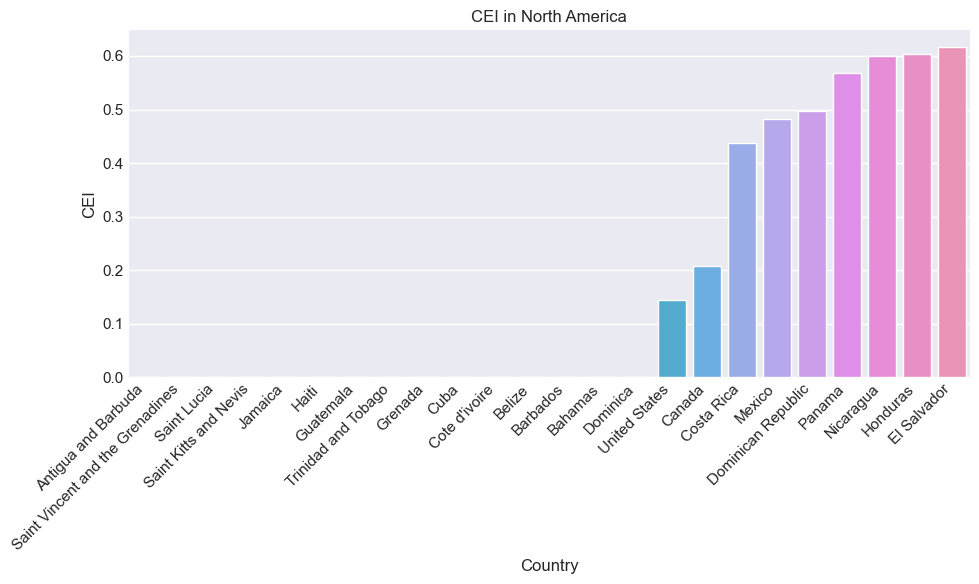

6. Argentina's NCSI compared to South America:
   Argentina NCSI: 63.64
   South America average NCSI: 48.29


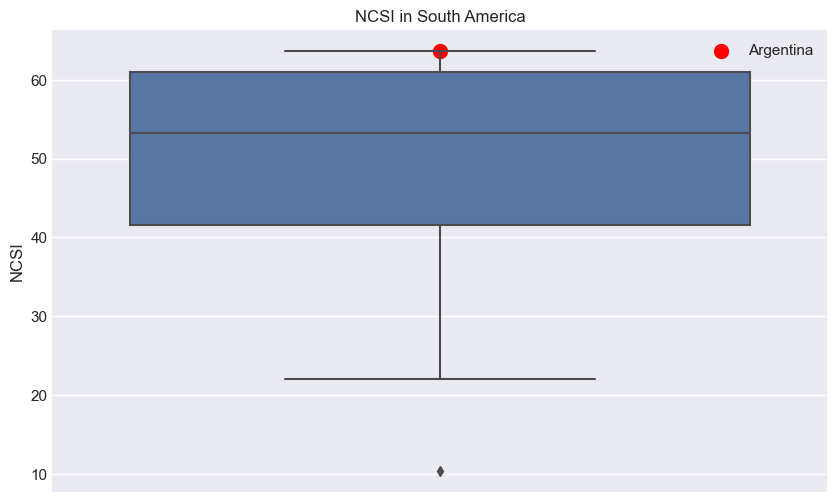

7. Correlation between DDL and GCI across regions:
Region
Africa           0.688186
Asia-Pasific     0.807416
Europe           0.804198
North America    0.303227
South America    0.709310
Name: (DDL, GCI), dtype: float64


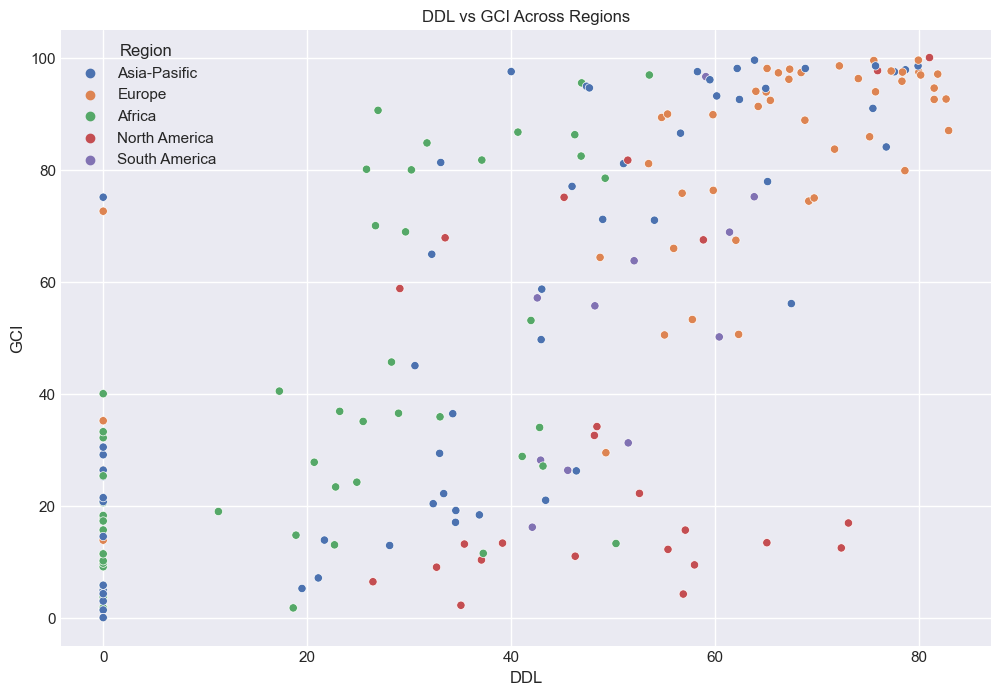

8. Countries with high CEI but low NCSI:
                    Country    CEI   NCSI
0               Afghanistan  1.000  11.69
20                  Bolivia  0.783  31.17
21   Bosnia and Herzegovina  0.583  28.57
29                 Cambodia  0.703  15.58
30                 Cameroon  0.707  32.47
51              El Salvador  0.617  24.68
56                 Ethiopia  0.866  32.47
72                 Honduras  0.603  22.08
78                     Iraq  0.690   5.19
84                   Jordan  0.586  28.57
88                   Kuwait  0.428   0.00
92                  Lebanon  0.579   0.00
95                    Libya  0.793  10.39
111                Mongolia  0.738  18.18
115                 Myanmar  0.910  10.39
116                 Namibia  0.679  15.58
118                   Nepal  0.762  28.57
121               Nicaragua  0.600  29.87
129               Palestine  0.855   0.00
168                Tanzania  0.731  24.68
187               Venezuela  0.807  28.57
191                Zimbabwe  0.724 

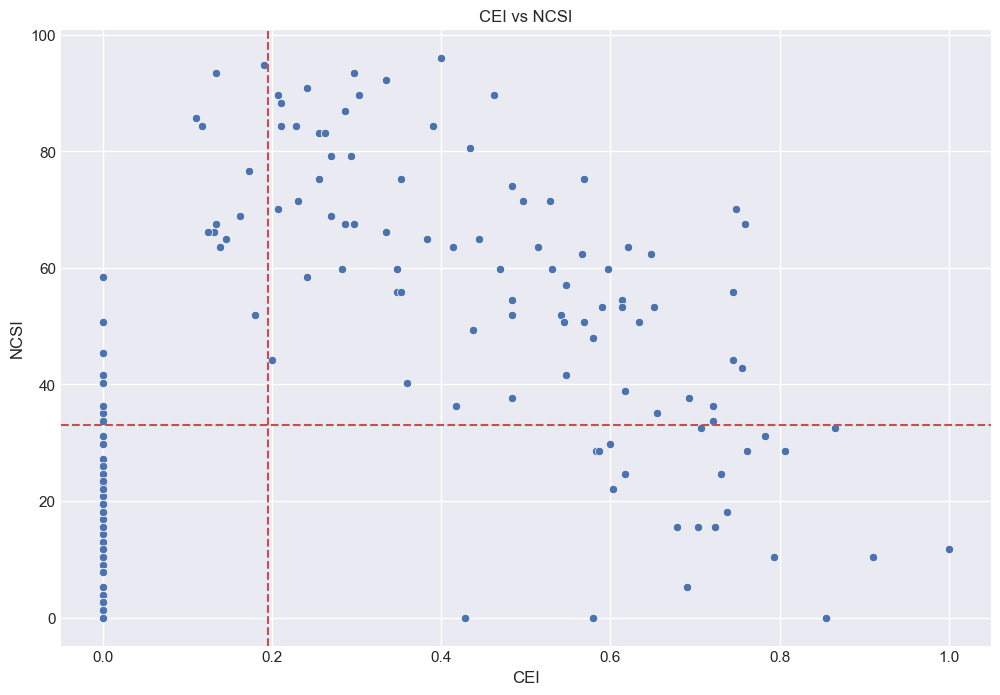

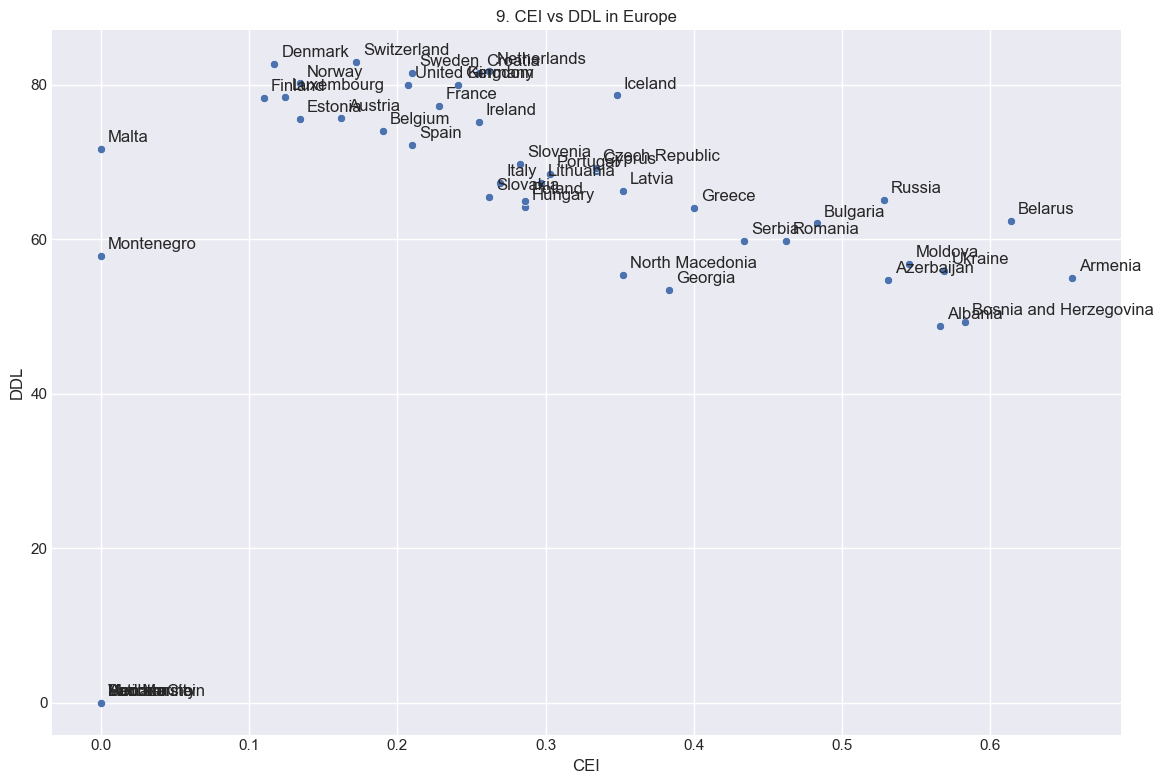

10. Top 5 countries with highest GCI:
            Country     GCI    CEI   NCSI
182   United States  100.00  0.145  64.94
147    Saudi Arabia   99.54  0.390  84.42
181  United Kingdom   99.54  0.207  89.61
54          Estonia   99.48  0.134  93.51
152       Singapore   98.52  0.231  71.43


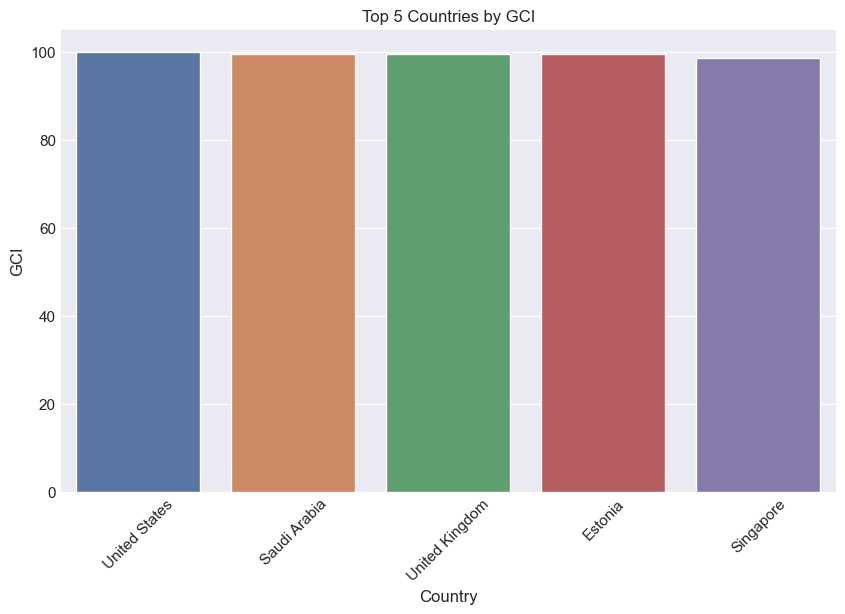

11. Regional distribution of countries with CEI of 0:
Region
Africa           36
Asia-Pasific     24
North America    15
Europe            7
South America     2
Name: count, dtype: int64


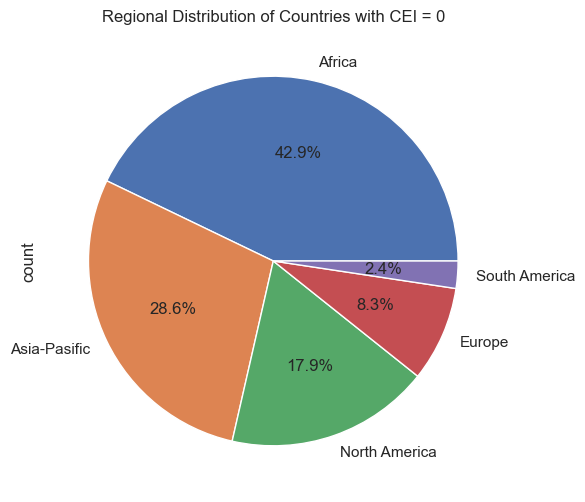

12. Canada's GCI compared to North America:
   Canada GCI: 97.67
   North America GCI:
                              Country     GCI
182                     United States  100.00
31                             Canada   97.67
108                            Mexico   81.68
48                 Dominican Republic   75.05
40                      Cote d'ivoire   67.82
39                         Costa Rica   67.45
42                               Cuba   58.76
130                            Panama   34.11
82                            Jamaica   32.53
173               Trinidad and Tobago   22.18
14                           Barbados   16.89
5                 Antigua and Barbuda   15.62
11                            Bahamas   13.37
51                        El Salvador   13.30
67                          Guatemala   13.13
141             Saint Kitts and Nevis   12.44
143  Saint Vincent and the Grenadines   12.18
142                       Saint Lucia   10.96
17                             Belize  

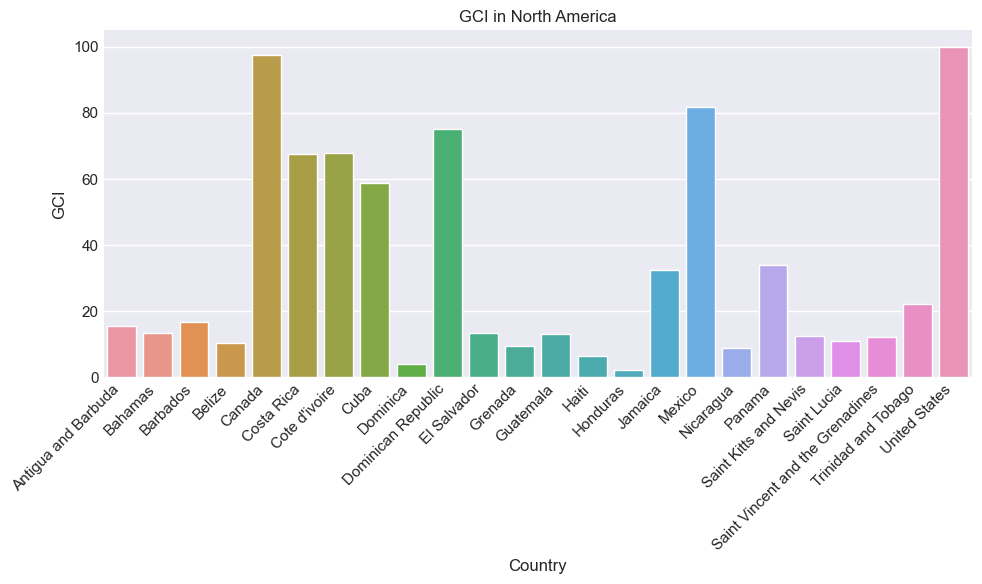

13. Australia's cybersecurity state:
     CEI    GCI   NCSI    DDL
8  0.131  97.47  66.23  77.61


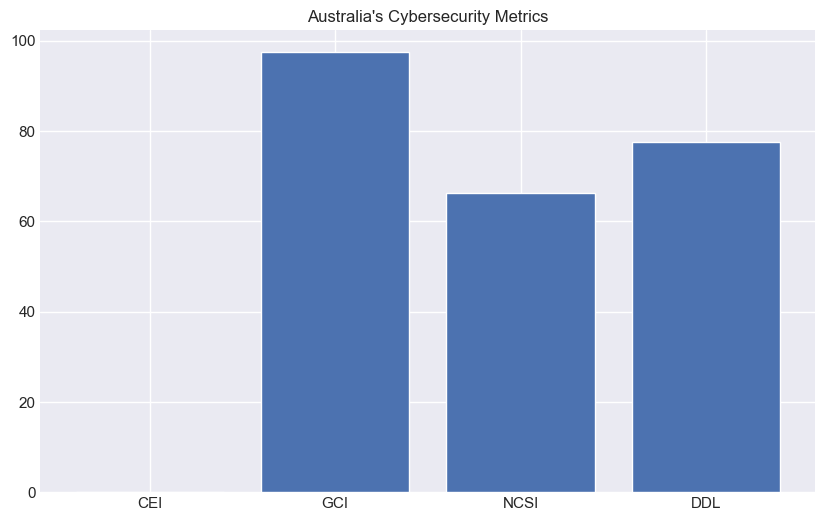

14. CEI patterns across regions:
                   mean  min    max
Region                             
Africa         0.209358  0.0  0.866
Asia-Pasific   0.308518  0.0  1.000
Europe         0.280625  0.0  0.655
North America  0.173292  0.0  0.617
South America  0.450818  0.0  0.783


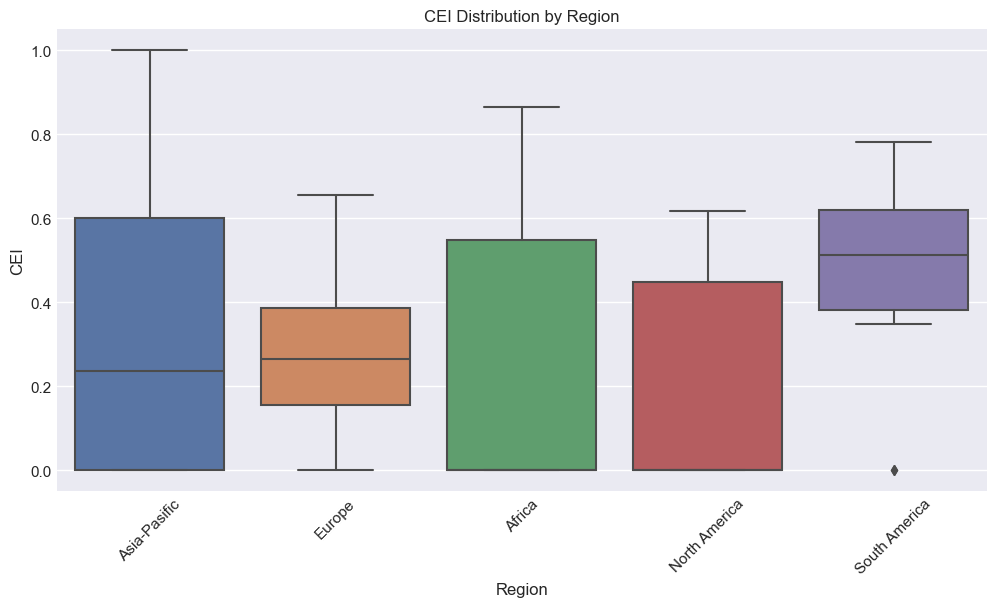

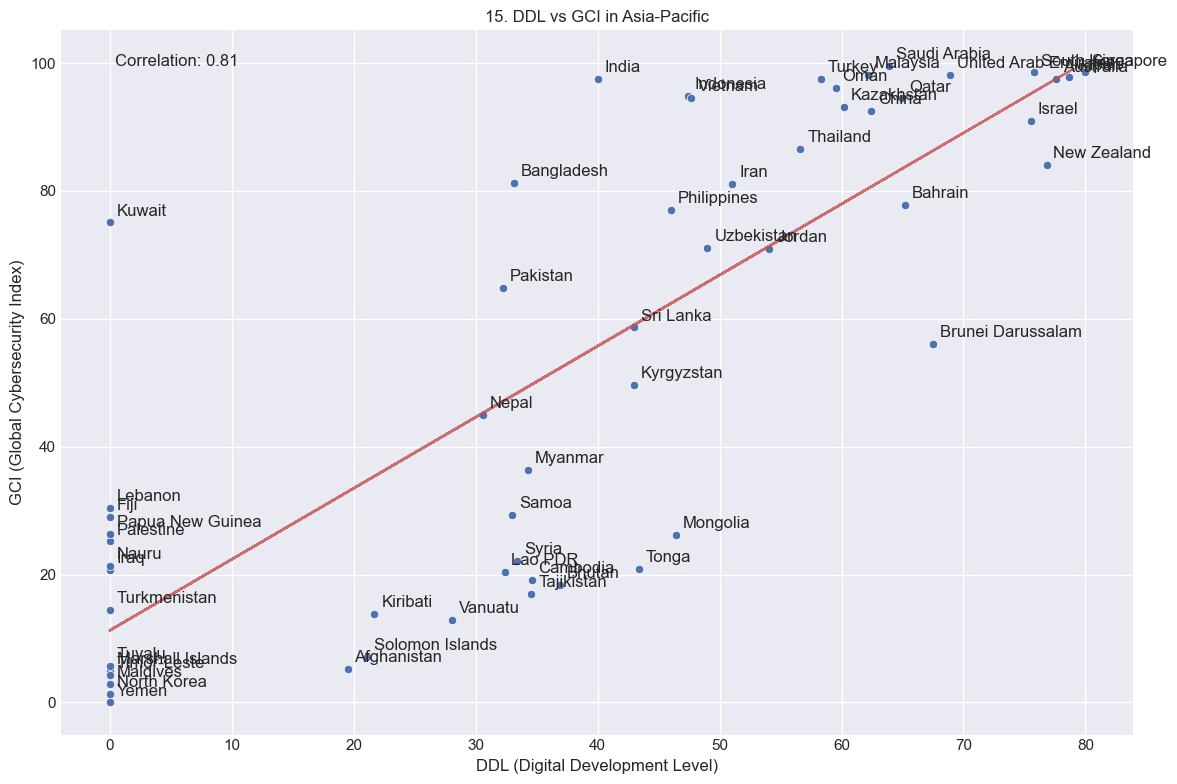


Summary statistics for Asia-Pacific region:
             DDL        GCI
count  56.000000  56.000000
mean   37.328036  52.757679
std    26.469802  36.436623
min     0.000000   0.000000
25%    14.625000  20.035000
50%    38.460000  52.855000
75%    59.677500  92.685000
max    79.930000  99.540000

Top 5 countries by GCI in Asia-Pacific:
                  Country    DDL    GCI
147          Saudi Arabia  63.89  99.54
152             Singapore  79.93  98.52
158           South Korea  75.76  98.52
101              Malaysia  62.19  98.06
180  United Arab Emirates  68.87  98.06


In [48]:

# Set the style for all plots
plt.style.use('seaborn-v0_8-darkgrid') 
sns.set_palette("deep")

def load_and_preprocess_data(file_path):
    df = pd.read_csv(file_path)
    df = df.rename(columns={
        'CEI (The Cybersecurity Exposure Index)': 'CEI',
        'GCI (The Global Cyber Security Index)': 'GCI',
        'NCSI (The National Cyber Security Index)': 'NCSI',
        'DDL (The Digital Development Level)': 'DDL'
    })
    return df

def highest_cei_asia_pacific(df):
    asia_pacific = df[df['Region'] == 'Asia-Pasific']
    highest_cei_country = asia_pacific.loc[asia_pacific['CEI'].idxmax()]
    print(f"1. Highest CEI in Asia-Pacific: {highest_cei_country['Country']}")
    print(f"   CEI: {highest_cei_country['CEI']:.2f}, GCI: {highest_cei_country['GCI']:.2f}, NCSI: {highest_cei_country['NCSI']:.2f}")
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='CEI', data=asia_pacific)
    plt.title('Distribution of CEI in Asia-Pacific')
    plt.show()

def albania_comparison(df):
    europe = df[df['Region'] == 'Europe']
    albania = europe[europe['Country'] == 'Albania']
    print("2. Albania's cybersecurity metrics compared to Europe:")
    print(albania[['CEI', 'GCI', 'NCSI']].T)
    print("\nEurope average:")
    print(europe[['CEI', 'GCI', 'NCSI']].mean())

    metrics = ['CEI', 'GCI', 'NCSI']
    albania_values = albania[metrics].values[0]
    europe_avg = europe[metrics].mean()

    plt.figure(figsize=(10, 6))
    x = np.arange(len(metrics))
    width = 0.35
    plt.bar(x - width/2, albania_values, width, label='Albania')
    plt.bar(x + width/2, europe_avg, width, label='Europe Average')
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.title("Albania's Cybersecurity Metrics vs Europe Average")
    plt.xticks(x, metrics)
    plt.legend()
    plt.show()

def highest_ncsi_africa(df):
    africa = df[df['Region'] == 'Africa']
    highest_ncsi_country = africa.loc[africa['NCSI'].idxmax()]
    print(f"3. Highest NCSI in Africa: {highest_ncsi_country['Country']}")
    print(f"   NCSI: {highest_ncsi_country['NCSI']:.2f}, DDL: {highest_ncsi_country['DDL']:.2f}")
    print(f"   CEI: {highest_ncsi_country['CEI']:.2f}, GCI: {highest_ncsi_country['GCI']:.2f}")

    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    sns.scatterplot(x='NCSI', y='DDL', data=africa)
    plt.title('NCSI vs DDL in Africa')
    plt.subplot(132)
    sns.scatterplot(x='NCSI', y='CEI', data=africa)
    plt.title('NCSI vs CEI in Africa')
    plt.subplot(133)
    sns.scatterplot(x='NCSI', y='GCI', data=africa)
    plt.title('NCSI vs GCI in Africa')
    plt.tight_layout()
    plt.show()

def south_america_cei_gci(df):
    south_america = df[df['Region'] == 'South America']
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='CEI', y='GCI', data=south_america, s=100)
    for i, row in south_america.iterrows():
        plt.annotate(row['Country'], (row['CEI'], row['GCI']), xytext=(5, 5), textcoords='offset points')
    plt.xlabel('CEI (Cybersecurity Exposure Index)')
    plt.ylabel('GCI (Global Cybersecurity Index)')
    plt.title('4. CEI vs GCI in South America')
    plt.show()

def lowest_cei_north_america(df):
    north_america = df[df['Region'] == 'North America'].sort_values('CEI')
    print("5. Countries in North America with lowest CEI:")
    print(north_america[['Country', 'CEI', 'GCI', 'NCSI']].head())

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Country', y='CEI', data=north_america)
    plt.title('CEI in North America')
    plt.xticks(rotation=45,ha='right')
    plt.tight_layout()
    plt.show()

def argentina_ncsi_comparison(df):
    south_america = df[df['Region'] == 'South America']
    argentina = south_america[south_america['Country'] == 'Argentina']
    print("6. Argentina's NCSI compared to South America:")
    print(f"   Argentina NCSI: {argentina['NCSI'].values[0]:.2f}")
    print(f"   South America average NCSI: {south_america['NCSI'].mean():.2f}")

    plt.figure(figsize=(10, 6))
    sns.boxplot(y='NCSI', data=south_america)
    plt.scatter(0, argentina['NCSI'].values[0], color='red', s=100, label='Argentina')
    plt.title('NCSI in South America')
    plt.legend()
    plt.show()

def ddl_gci_correlation(df):
    correlation = df.groupby('Region')[['DDL', 'GCI']].corr().unstack().iloc[:, 1]
    print("7. Correlation between DDL and GCI across regions:")
    print(correlation)

    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='DDL', y='GCI', hue='Region', data=df)
    plt.title('DDL vs GCI Across Regions')
    plt.show()

def high_cei_low_ncsi(df):
    high_cei_low_ncsi = df[(df['CEI'] > df['CEI'].median()) & (df['NCSI'] < df['NCSI'].median())]
    print("8. Countries with high CEI but low NCSI:")
    print(high_cei_low_ncsi[['Country', 'CEI', 'NCSI']])

    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='CEI', y='NCSI', data=df)
    plt.axvline(df['CEI'].median(), color='r', linestyle='--')
    plt.axhline(df['NCSI'].median(), color='r', linestyle='--')
    plt.title('CEI vs NCSI')
    plt.show()

def europe_cei_ddl(df):
    europe = df[df['Region'] == 'Europe']
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='CEI', y='DDL', data=europe)
    for i, row in europe.iterrows():
        plt.annotate(row['Country'], (row['CEI'], row['DDL']), xytext=(5, 5), textcoords='offset points')
    plt.xlabel('CEI')
    plt.ylabel('DDL')
    plt.title('9. CEI vs DDL in Europe') 
    plt.tight_layout()
    plt.show()
  

def top_5_gci(df):
    top_5 = df.nlargest(5, 'GCI')
    print("10. Top 5 countries with highest GCI:")
    print(top_5[['Country', 'GCI', 'CEI', 'NCSI']])

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Country', y='GCI', data=top_5)
    plt.title('Top 5 Countries by GCI')
    plt.xticks(rotation=45)
    plt.show()

def cei_zero_distribution(df):
    cei_zero = df[df['CEI'] == 0]
    print("11. Regional distribution of countries with CEI of 0:")
    print(cei_zero['Region'].value_counts())

    plt.figure(figsize=(10, 6))
    cei_zero['Region'].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Regional Distribution of Countries with CEI = 0')
    plt.show()

def canada_gci_comparison(df):
    north_america = df[df['Region'] == 'North America']
    canada = north_america[north_america['Country'] == 'Canada']
    print("12. Canada's GCI compared to North America:")
    print(f"   Canada GCI: {canada['GCI'].values[0]:.2f}")
    print("   North America GCI:")
    print(north_america[['Country', 'GCI']].sort_values('GCI', ascending=False))

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Country', y='GCI', data=north_america)
    plt.title('GCI in North America')
    plt.xticks(rotation=45,ha='right')
    plt.tight_layout()
    plt.show()

def australia_cybersecurity(df):
    australia = df[df['Country'] == 'Australia']
    print("13. Australia's cybersecurity state:")
    print(australia[['CEI', 'GCI', 'NCSI', 'DDL']])

    metrics = ['CEI', 'GCI', 'NCSI', 'DDL']
    values = australia[metrics].values[0]
    plt.figure(figsize=(10, 6))
    plt.bar(metrics, values)
    plt.title("Australia's Cybersecurity Metrics")
    plt.show()

def cei_regional_patterns(df):
    regional_cei = df.groupby('Region')['CEI'].agg(['mean', 'min', 'max'])
    print("14. CEI patterns across regions:")
    print(regional_cei)

    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Region', y='CEI', data=df)
    plt.title('CEI Distribution by Region')
    plt.xticks(rotation=45)
    plt.show()

def asia_pacific_ddl_gci(df):
    asia_pacific = df[df['Region'] == 'Asia-Pasific']
    
    if asia_pacific.empty:
        print("15. DDL vs GCI in Asia-Pacific: No data available for the Asia-Pacific region.")
        return
    
    if asia_pacific['DDL'].isnull().all() or asia_pacific['GCI'].isnull().all():
        print("15. DDL vs GCI in Asia-Pacific: Missing data for DDL or GCI in the Asia-Pacific region.")
        print("Available columns:", asia_pacific.columns.tolist())
        print("Sample data:")
        print(asia_pacific.head())
        return
    
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='DDL', y='GCI', data=asia_pacific)
    
    for i, row in asia_pacific.iterrows():
        plt.annotate(row['Country'], (row['DDL'], row['GCI']), xytext=(5, 5), textcoords='offset points')
    
    plt.xlabel('DDL (Digital Development Level)')
    plt.ylabel('GCI (Global Cybersecurity Index)')
    plt.title('15. DDL vs GCI in Asia-Pacific')
    
    # Add a trend line
    z = np.polyfit(asia_pacific['DDL'], asia_pacific['GCI'], 1)
    p = np.poly1d(z)
    plt.plot(asia_pacific['DDL'], p(asia_pacific['DDL']), "r--", alpha=0.8)
     # Add correlation coefficient
    correlation = asia_pacific['DDL'].corr(asia_pacific['GCI'])
    plt.annotate(f'Correlation: {correlation:.2f}', xy=(0.05, 0.95), xycoords='axes fraction')
    plt.tight_layout()
    plt.show()
        
    print("\nSummary statistics for Asia-Pacific region:")
    print(asia_pacific[['DDL', 'GCI']].describe())
    
    print("\nTop 5 countries by GCI in Asia-Pacific:")
    print(asia_pacific.nlargest(5, 'GCI')[['Country', 'DDL', 'GCI']])



def main():
    file_path = r"C:\Users\raswa\OneDrive\Desktop\Altair\Cyber_security.csv"
    df = load_and_preprocess_data(file_path)
    
    highest_cei_asia_pacific(df)
    albania_comparison(df)
    highest_ncsi_africa(df)
    south_america_cei_gci(df)
    lowest_cei_north_america(df)
    argentina_ncsi_comparison(df)
    ddl_gci_correlation(df)
    high_cei_low_ncsi(df)
    europe_cei_ddl(df)
    top_5_gci(df)
    cei_zero_distribution(df)
    canada_gci_comparison(df)
    australia_cybersecurity(df)
    cei_regional_patterns(df)
    asia_pacific_ddl_gci(df)

if __name__ == "__main__":
    main()

In [34]:
pip install --upgrade matplotlib

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\users\\raswa\\anaconda3\\anaconda retry\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
Consider using the `--user` option or check the permissions.




  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/8b/ce/15b0bb2fb29b3d46211d8ca740b96b5232499fc49200b58b8d571292c9a6/matplotlib-3.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
    --------------------------------------- 0.1/7.8 MB 2.2 MB/s eta 0:00:04
   ---- ----------------------------------- 0.8/7.8 MB 8.4 MB/s eta 0:00:01
   ------ --------------------------------- 1.3/7.8 MB 10.1 MB/s eta 0:00:01
   -------- ------------------------------- 1.6/7.8 MB 8.3 MB/s eta 0:00:01
   ---------- ----------------------------- 2.0/7.8 MB 9.6 MB/s eta 0:00:01
   ------------ --------------------------- 2.5/7.8 MB 9.0 MB/s eta 0:00:01
   -------------- ------------------------- 2.8/7.8 MB 8.6 MB/s eta 0:00:01
   ---------------- ----------------------- 3.2/7.8 MB 8.5 MB/s eta 0:00:01
   ----------------- ---------------------- 3.5/7.8 MB 8.3 MB/s eta 0:00:01
   ------------------- --------

Correlation coefficient: 0.7218342863594713
P-value: 3.384693551429473e-32


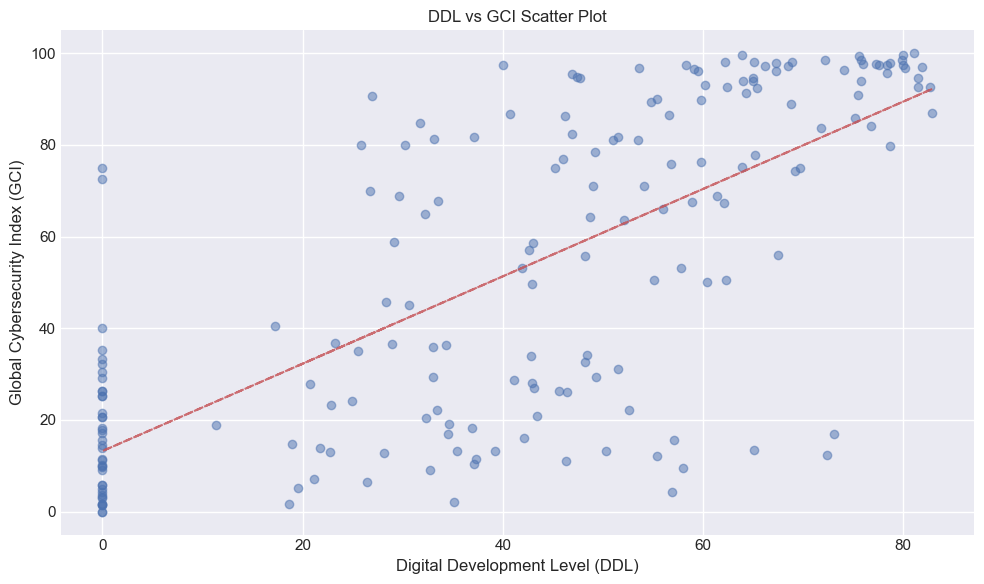

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Assuming your data is in a DataFrame called 'df'
# df = pd.read_csv('your_data.csv')

# Calculate Pearson correlation coefficient
correlation, p_value = stats.pearsonr(df['DDL'], df['GCI'])

print(f"Correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['DDL'], df['GCI'], alpha=0.5)
plt.xlabel('Digital Development Level (DDL)')
plt.ylabel('Global Cybersecurity Index (GCI)')
plt.title('DDL vs GCI Scatter Plot')

# Add trend line
z = np.polyfit(df['DDL'], df['GCI'], 1)
p = np.poly1d(z)
plt.plot(df['DDL'], p(df['DDL']), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

C:\Users\raswa\anaconda3\anaconda retry\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\raswa\anaconda3\anaconda retry\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\raswa\anaconda3\anaconda retry\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\raswa\anaconda3\anaconda retry\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

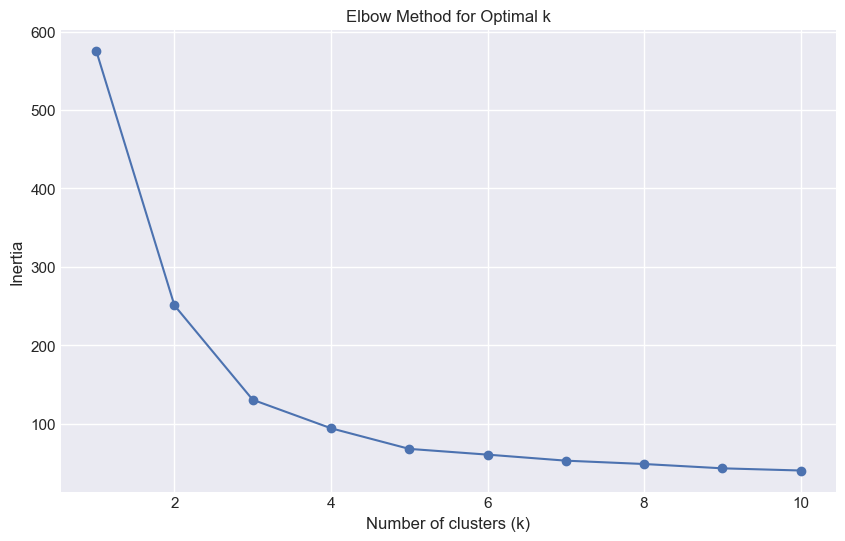

C:\Users\raswa\anaconda3\anaconda retry\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\raswa\anaconda3\anaconda retry\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


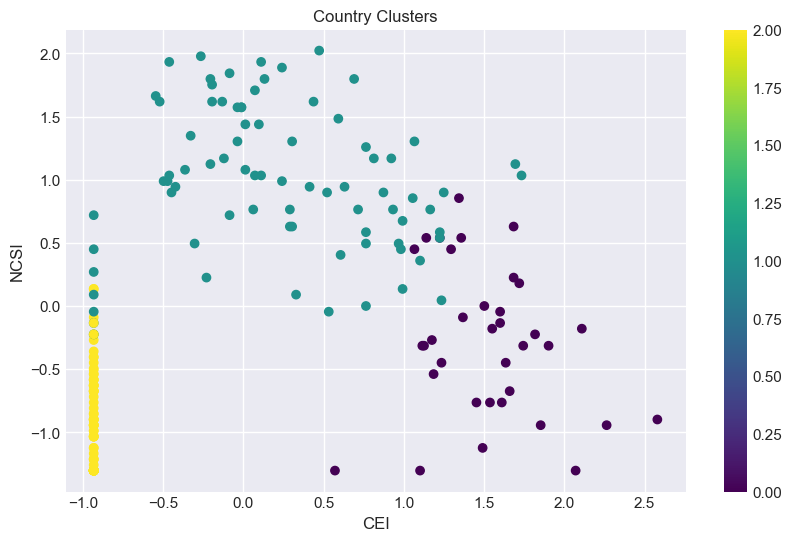

Cluster 0 centroid: [ 0.6996     29.23942857 39.71542857]
Cluster 1 centroid: [ 0.3309375 66.169125  88.064375 ]
Cluster 2 centroid: [2.22044605e-16 1.18868831e+01 2.06625974e+01]


In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'df'
# df = pd.read_csv('your_data.csv')

# Select features for clustering
features = ['CEI', 'NCSI', 'GCI']
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using elbow method
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Based on the elbow curve, choose the optimal number of clusters
optimal_k = 3  # This should be determined from the elbow curve

# Perform K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters (using first two features for 2D plot)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('Country Clusters')
plt.colorbar(scatter)
plt.show()

# Print cluster centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
for i, centroid in enumerate(centroids):
    print(f"Cluster {i} centroid: {centroid}")

C:\Users\raswa\anaconda3\anaconda retry\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\raswa\anaconda3\anaconda retry\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\raswa\anaconda3\anaconda retry\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\raswa\anaconda3\anaconda retry\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

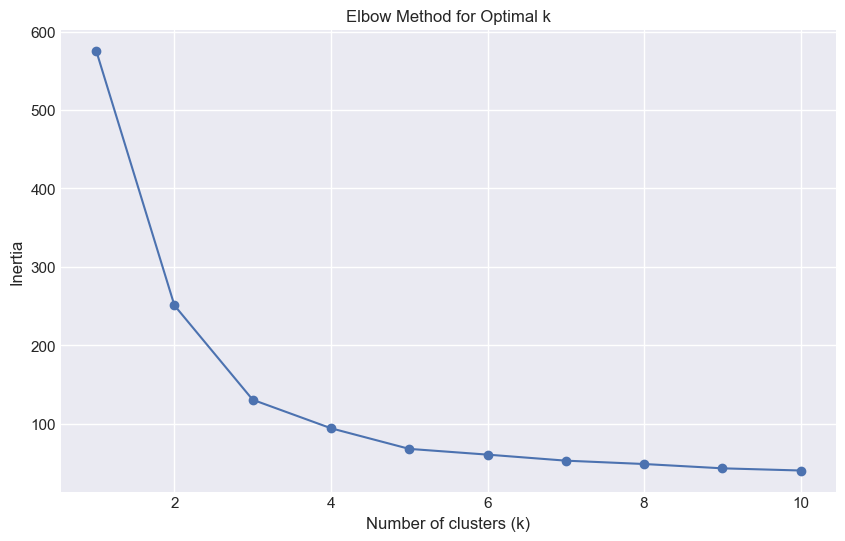

C:\Users\raswa\anaconda3\anaconda retry\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\raswa\anaconda3\anaconda retry\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


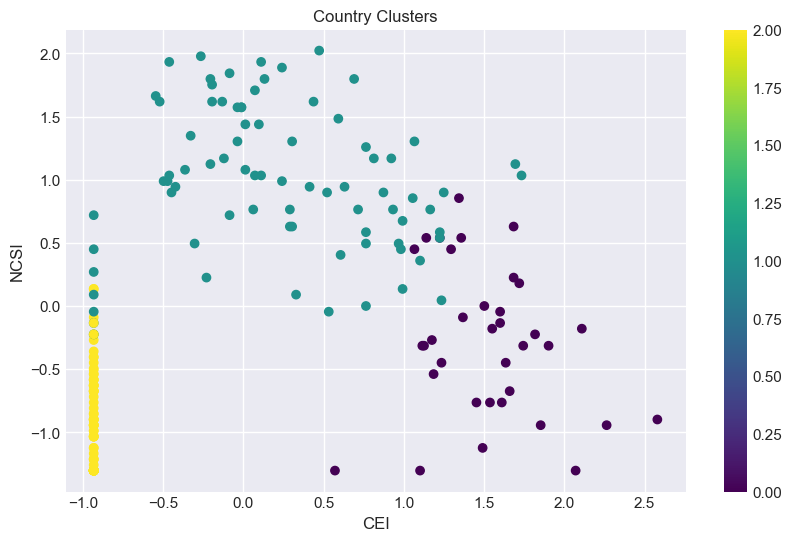

Cluster 0 centroid: [ 0.6996     29.23942857 39.71542857]
Cluster 1 centroid: [ 0.3309375 66.169125  88.064375 ]
Cluster 2 centroid: [2.22044605e-16 1.18868831e+01 2.06625974e+01]


In [51]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'df'
# df = pd.read_csv('your_data.csv')

# Select features for clustering
features = ['CEI', 'NCSI', 'GCI']
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using elbow method
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Based on the elbow curve, choose the optimal number of clusters
optimal_k = 3  # This should be determined from the elbow curve

# Perform K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters (using first two features for 2D plot)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('Country Clusters')
plt.colorbar(scatter)
plt.show()

# Print cluster centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
for i, centroid in enumerate(centroids):
    print(f"Cluster {i} centroid: {centroid}")

Countries with high CEI but low GCI or NCSI:
         Country    CEI    GCI   NCSI
0    Afghanistan  1.000   5.20  11.69
129    Palestine  0.855  25.18   0.00


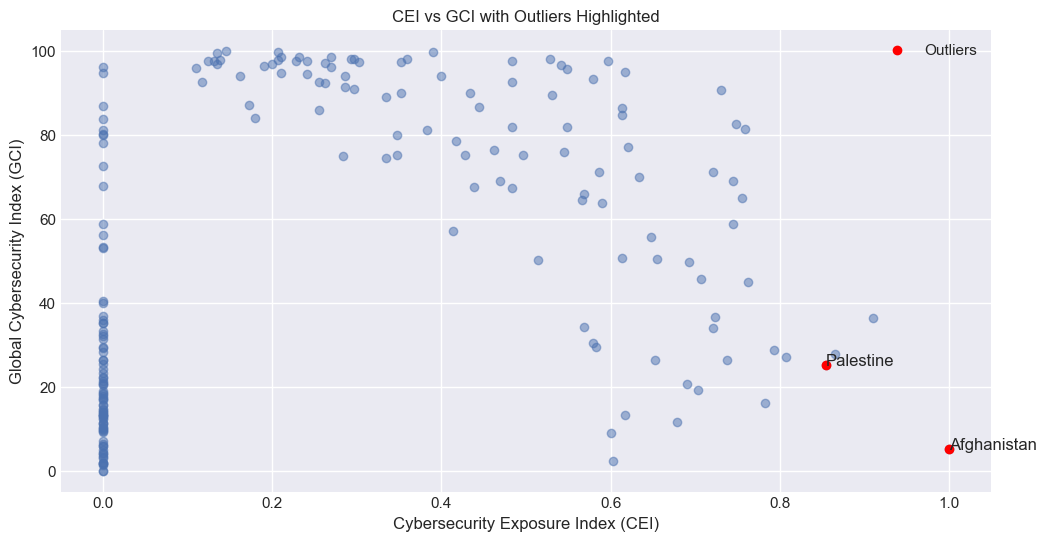


Analysis for Afghanistan:
CEI: 1.00, GCI: 5.20, NCSI: 11.69
Digital Development Level: 19.50

Analysis for Palestine:
CEI: 0.85, GCI: 25.18, NCSI: 0.00
Digital Development Level: 0.00


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'df'
# df = pd.read_csv('your_data.csv')

# Calculate z-scores for CEI, GCI, and NCSI
df['CEI_zscore'] = (df['CEI'] - df['CEI'].mean()) / df['CEI'].std()
df['GCI_zscore'] = (df['GCI'] - df['GCI'].mean()) / df['GCI'].std()
df['NCSI_zscore'] = (df['NCSI'] - df['NCSI'].mean()) / df['NCSI'].std()

# Identify outliers (high CEI, low GCI or NCSI)
outliers = df[(df['CEI_zscore'] > 2) & ((df['GCI_zscore'] < -1) | (df['NCSI_zscore'] < -1))]

# Print outliers
print("Countries with high CEI but low GCI or NCSI:")
print(outliers[['Country', 'CEI', 'GCI', 'NCSI']])

# Visualize outliers
plt.figure(figsize=(12, 6))
plt.scatter(df['CEI'], df['GCI'], alpha=0.5)
plt.scatter(outliers['CEI'], outliers['GCI'], color='red', label='Outliers')
for i, txt in enumerate(outliers['Country']):
    plt.annotate(txt, (outliers['CEI'].iloc[i], outliers['GCI'].iloc[i]))
plt.xlabel('Cybersecurity Exposure Index (CEI)')
plt.ylabel('Global Cybersecurity Index (GCI)')
plt.title('CEI vs GCI with Outliers Highlighted')
plt.legend()
plt.show()

# Analyze potential reasons for outliers
for _, country in outliers.iterrows():
    print(f"\nAnalysis for {country['Country']}:")
    print(f"CEI: {country['CEI']:.2f}, GCI: {country['GCI']:.2f}, NCSI: {country['NCSI']:.2f}")
    print(f"Digital Development Level: {country['DDL']:.2f}")
    # Add more analysis here based on other available data

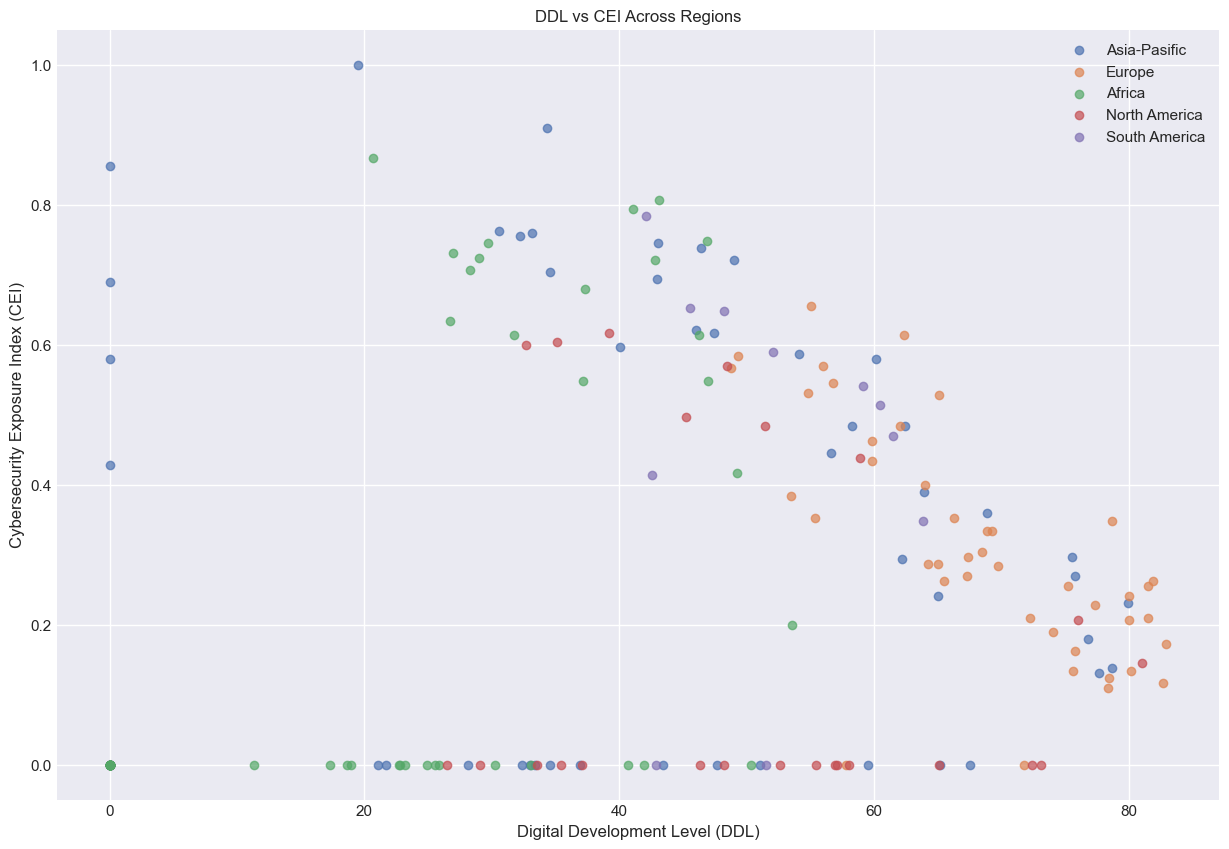

Correlation between DDL and CEI by region:
Asia-Pasific: 0.10
Europe: 0.24
Africa: 0.60
North America: -0.20
South America: -0.03


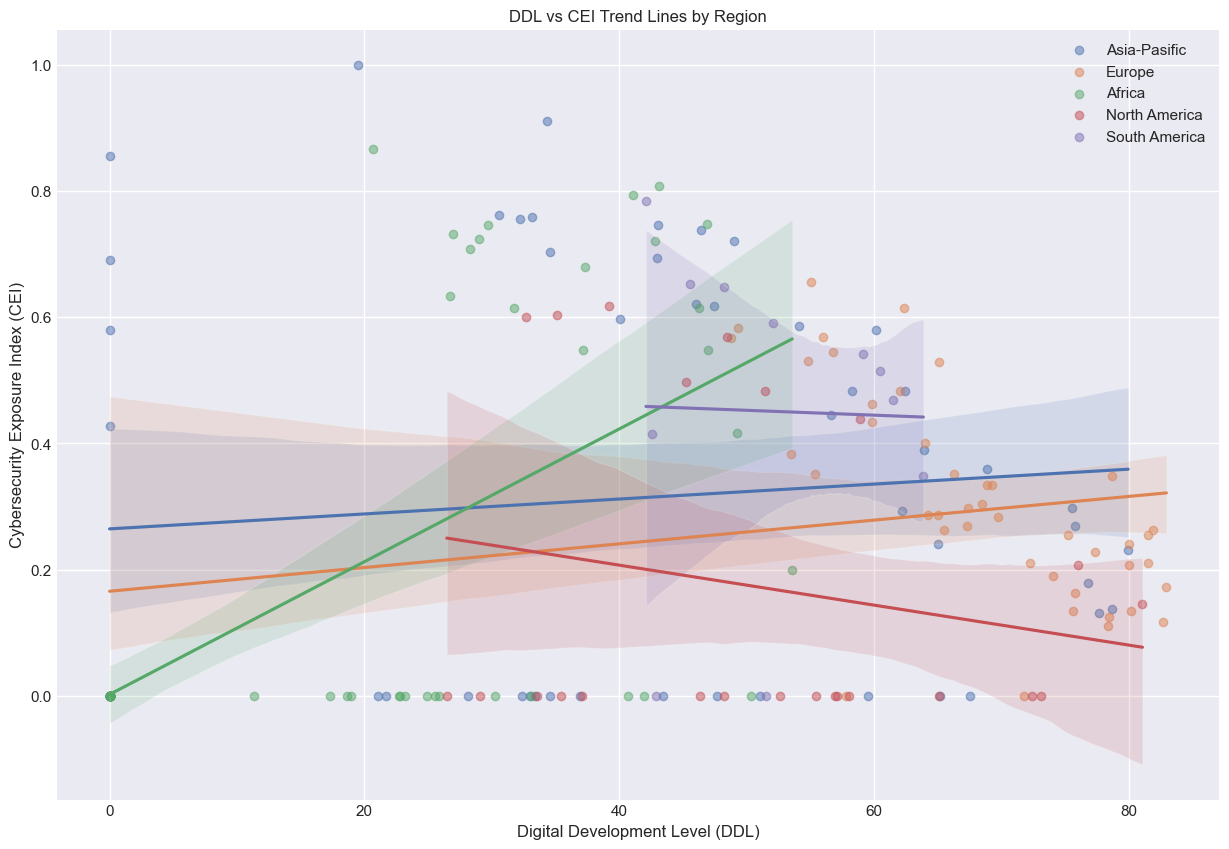

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming your data is in a DataFrame called 'df'
# df = pd.read_csv('your_data.csv')

# Create scatter plot for each region
plt.figure(figsize=(15, 10))
for region in df['Region'].unique():
    region_data = df[df['Region'] == region]
    plt.scatter(region_data['DDL'], region_data['CEI'], label=region, alpha=0.7)

plt.xlabel('Digital Development Level (DDL)')
plt.ylabel('Cybersecurity Exposure Index (CEI)')
plt.title('DDL vs CEI Across Regions')
plt.legend()
plt.show()

# Calculate and print correlation for each region
print("Correlation between DDL and CEI by region:")
for region in df['Region'].unique():
    region_data = df[df['Region'] == region]
    correlation, _ = stats.pearsonr(region_data['DDL'], region_data['CEI'])
    print(f"{region}: {correlation:.2f}")

# Regression analysis for each region
plt.figure(figsize=(15, 10))
for region in df['Region'].unique():
    region_data = df[df['Region'] == region]
    sns.regplot(x='DDL', y='CEI', data=region_data, label=region, scatter_kws={'alpha':0.5})

plt.xlabel('Digital Development Level (DDL)')
plt.ylabel('Cybersecurity Exposure Index (CEI)')
plt.title('DDL vs CEI Trend Lines by Region')
plt.legend()
plt.show()

Correlation between DDL and GCI: 0.721834286359472


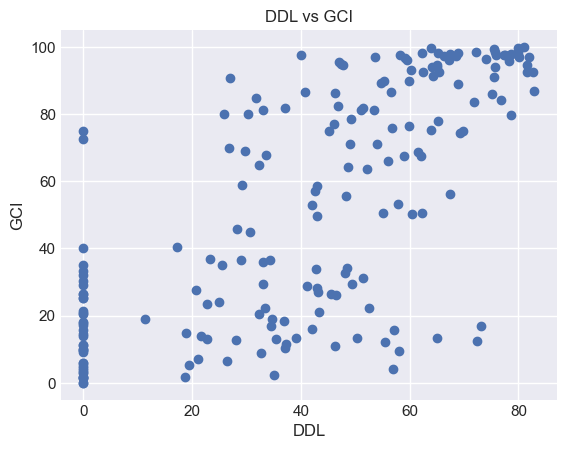

In [55]:
import pandas as pd
import matplotlib.pyplot as plt



# Calculate correlation
corr = df['DDL'].corr(df['GCI'])
print(f"Correlation between DDL and GCI: {corr}")

# Make a simple scatter plot
plt.scatter(df['DDL'], df['GCI'])
plt.xlabel('DDL')
plt.ylabel('GCI')
plt.title('DDL vs GCI')
plt.show()

C:\Users\raswa\anaconda3\anaconda retry\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\raswa\anaconda3\anaconda retry\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


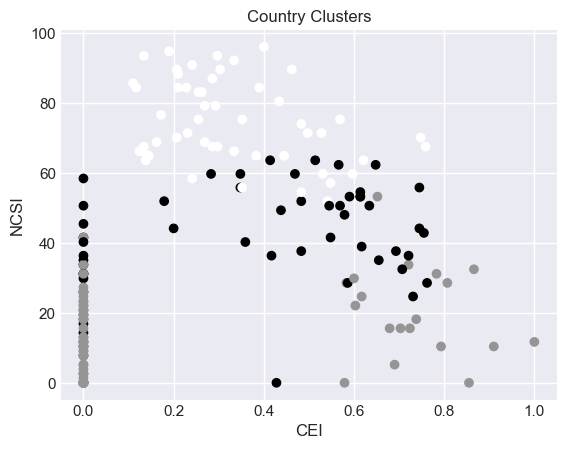

In [56]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Prepare data
X = df[['CEI', 'NCSI', 'GCI']]

# Do K-means
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(X)

# Plot results
plt.scatter(df['CEI'], df['NCSI'], c=df['Cluster'])
plt.xlabel('CEI')
plt.ylabel('NCSI')
plt.title('Country Clusters')
plt.show()

Region
Europe           67.634375
South America    48.290000
Asia-Pasific     30.611964
North America    29.438333
Africa           19.505094
Name: NCSI, dtype: float64


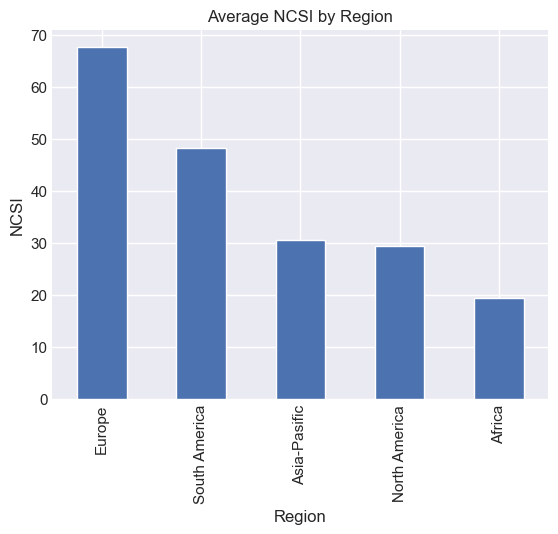

In [57]:
# Group by region and get mean NCSI
region_ncsi = df.groupby('Region')['NCSI'].mean().sort_values(ascending=False)

# Print results
print(region_ncsi)

# Make a bar chart
region_ncsi.plot(kind='bar')
plt.title('Average NCSI by Region')
plt.ylabel('NCSI')
plt.show()

Countries with high CEI but low GCI:
         Country    CEI    GCI
0    Afghanistan  1.000   5.20
20       Bolivia  0.783  16.14
51   El Salvador  0.617  13.30
72      Honduras  0.603   2.20
116      Namibia  0.679  11.47
121    Nicaragua  0.600   9.00


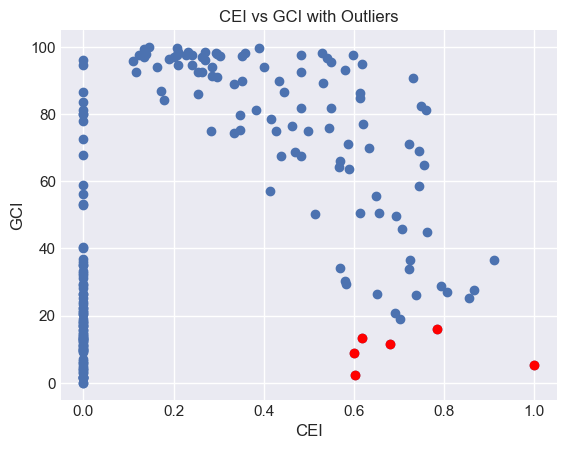

In [58]:
# Find countries with high CEI but low GCI
outliers = df[(df['CEI'] > df['CEI'].mean() + df['CEI'].std()) & 
              (df['GCI'] < df['GCI'].mean() - df['GCI'].std())]

# Print outliers
print("Countries with high CEI but low GCI:")
print(outliers[['Country', 'CEI', 'GCI']])

# Plot
plt.scatter(df['CEI'], df['GCI'])
plt.scatter(outliers['CEI'], outliers['GCI'], color='red')
plt.xlabel('CEI')
plt.ylabel('GCI')
plt.title('CEI vs GCI with Outliers')
plt.show()

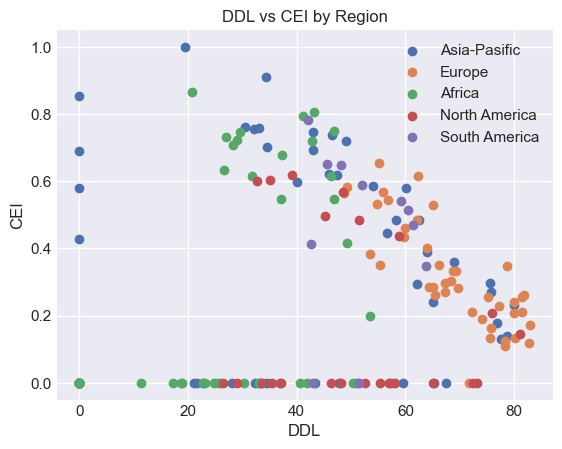

Asia-Pasific correlation: 0.09708600395609224
Europe correlation: 0.23710787218050658
Africa correlation: 0.6004614702904848
North America correlation: -0.19540591282670017
South America correlation: -0.025070169491825892


In [59]:
import matplotlib.pyplot as plt

# Loop through regions and plot
for region in df['Region'].unique():
    region_data = df[df['Region'] == region]
    plt.scatter(region_data['DDL'], region_data['CEI'], label=region)

plt.xlabel('DDL')
plt.ylabel('CEI')
plt.title('DDL vs CEI by Region')
plt.legend()
plt.show()

# Print correlations
for region in df['Region'].unique():
    region_data = df[df['Region'] == region]
    corr = region_data['DDL'].corr(region_data['CEI'])
    print(f"{region} correlation: {corr}")